In [1]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re 
import string

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv('/kaggle/input/question-pairs-dataset/questions.csv')

In [3]:
df.shape

(404351, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df['is_duplicate'].unique()

array([0, 1])

# Basic Data Cleaning

In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

0

# Text Preprocessing

In [9]:
short_words = { 
    "u":"you",
    "4u":"for you",
    "4":"for",
    "2":"to",
    "2u":"to you",
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

In [10]:
stemmer=PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    text = text.replace(',000,000,000 ', 'b ')
    text = text.replace(',000,000 ', 'm ')
    text = text.replace(',000 ', 'k ')
    text = text.replace('%', ' percent')
    text = text.replace('$', ' dollar ')
    text = text.replace('₹', ' rupee ')
    text = text.replace('€', ' euro ')
    text = text.replace('@', ' at ')
    text = text.replace('[math]', '')
    text = re.sub(r'([0-9]+)000000000', r'\1b', text)
    text = re.sub(r'([0-9]+)000000', r'\1m', text)
    text = re.sub(r'([0-9]+)000', r'\1k', text)
    
    tokens = word_tokenize(text)
    tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in tokens]
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [short_words.get(token, token) for token in tokens]
    tokens = [stemmer.stem(token) for token in tokens]
    
    text = ' '.join(tokens)
    text = text.replace("'ve", " have")
    text = text.replace("n't", " not")
    text = text.replace("'re", " are")
    text = text.replace("'ll", " will")
    
    return text


In [11]:
df.shape

(404348, 6)

In [12]:
# Testing the function
df['clean_question1']=df['question1'].apply(preprocess_text)

In [13]:
df['clean_question2']=df['question2'].apply(preprocess_text)

In [14]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,clean_question1,clean_question2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the stori of kohinoor kohinoor diamond,what would happen if the indian govern stole t...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,whi am i mental veri lone how can i solv it,find the remaind when math is divid by
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water


# Feature Engineering

## Dataset New Features

We will be creating new features for our dataset. The following are the main important ones:

1. **Number of Sentences**
2. **Number of Words**
3. **Number of Characters**
4. **Word Share**
5. **Common Words**
6. **Total Words** (by summing the length of both)
7. **Total Sentences** (by summing the length of sentences)
8. **cwc-min** (common word count - minimum)
9. **cwc-max** (common word count - maximum)
10. **ctc-min** (common token count - minimum)
11. **ctc-max** (common token count - maximum)
12. **First Word Same**
13. **Last Word Same**
14. **Mean Words**
15. **Mean Length of Sentences**
16. **Mean Token Length**
17. **Absolute Difference in Token Lengths**
18. **Longest Substring Ratio**
19. **Fuzz Ratio**
20. **Fuzz Partial Ratio**
21. **Token Sort Ratio**
22. **Token Set Ratio**

These new features will provide valuable insights and information to enhance the understanding and analysis of dataset.


In [15]:
# For question 1 
df['n_words_q1']=df['clean_question1'].apply(lambda x: len([x for x in word_tokenize(x)]))
df['n_sentences_q1']=df['clean_question1'].apply(lambda x: len([x for x in sent_tokenize(x)]))
df['length_sentence_q1']=df['clean_question1'].apply(len)

In [16]:
# for question 2 
df['n_words_q2']=df['clean_question2'].apply(lambda x: len([x for x in word_tokenize(x)]))
df['n_sentences_q2']=df['clean_question2'].apply(lambda x: len([x for x in sent_tokenize(x)]))
df['length_sentence_q2']=df['clean_question2'].apply(len)

In [17]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,clean_question1,clean_question2,n_words_q1,n_sentences_q1,length_sentence_q1,n_words_q2,n_sentences_q2,length_sentence_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,14,1,64,12,1,55
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the stori of kohinoor kohinoor diamond,what would happen if the indian govern stole t...,8,1,46,13,1,79
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,14,1,66,10,1,52
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,whi am i mental veri lone how can i solv it,find the remaind when math is divid by,11,1,43,8,1,38
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,13,1,70,7,1,37


In [18]:
def basic_features(row):
    w1 = set(map(lambda word: word.lower().strip(), row['clean_question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['clean_question2'].split(" ")))
    common_words = len(w1 & w2)
    row['common_words'] = common_words
    
    w1 = set(map(lambda word: word.lower().strip(), row['clean_question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['clean_question2'].split(" ")))
    
    total_words = len(w1) + len(w2)
    row['total_words'] = total_words
    
    if total_words != 0:
        row['word_share'] = round(row['common_words'] / row['total_words'], 2)
    else:
        row['word_share'] = 0.0
    return row


In [19]:
df=df.apply(basic_features,axis=1)

In [20]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'clean_question1', 'clean_question2', 'n_words_q1', 'n_sentences_q1',
       'length_sentence_q1', 'n_words_q2', 'n_sentences_q2',
       'length_sentence_q2', 'common_words', 'total_words', 'word_share'],
      dtype='object')

In [21]:
df['clean_question1'][0]

'what is the step by step guid to invest in share market in india'

In [22]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,clean_question1,clean_question2,n_words_q1,n_sentences_q1,length_sentence_q1,n_words_q2,n_sentences_q2,length_sentence_q2,common_words,total_words,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,14,1,64,12,1,55,11,23,0.48
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the stori of kohinoor kohinoor diamond,what would happen if the indian govern stole t...,8,1,46,13,1,79,4,18,0.22
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,14,1,66,10,1,52,5,24,0.21
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,whi am i mental veri lone how can i solv it,find the remaind when math is divid by,11,1,43,8,1,38,0,18,0.00
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,13,1,70,7,1,37,4,20,0.20


In [23]:
!pip install distance

In [24]:
import distance

In [25]:
def token_features(row):
    q1_tokens = row['clean_question1'].split(" ")
    q2_tokens = row['clean_question2'].split(" ")
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return row  
    row['abs_length_tokens'] = abs(len(q1_tokens) - len(q2_tokens))
    row['mean_length_tokens'] = (len(q1_tokens) + len(q2_tokens)) / 2
    strs = list(distance.lcsubstrings(row['clean_question1'], row['clean_question2']))
    if len(strs) == 0:
        row['substring_dis'] = 0
    else:
        row['substring_dis'] = len(strs[0]) / (min(len(row['clean_question1']), len(row['clean_question2'])) + 1)
    
    return row


In [26]:
df=df.apply(token_features,axis=1)

In [27]:
from fuzzywuzzy import fuzz

In [28]:
def fuzzy_features(row):    
    row['fuzz_ratio'] = fuzz.QRatio(row['clean_question1'], row['clean_question2'])
    row['fuzz_partial_ratio'] = fuzz.partial_ratio(row['clean_question1'], row['clean_question2'])
    row['token_sort_ratio'] = fuzz.token_sort_ratio(row['clean_question1'], row['clean_question2'])
    row['token_set_ratio'] = fuzz.token_set_ratio(row['clean_question1'], row['clean_question2'])
    return row

In [29]:
df=df.apply(fuzzy_features,axis=1)

In [30]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,clean_question1,clean_question2,n_words_q1,n_sentences_q1,...,common_words,total_words,word_share,abs_length_tokens,mean_length_tokens,substring_dis,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,14,1,...,11,23,0.48,2,13.0,0.982143,92,100,92,100
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the stori of kohinoor kohinoor diamond,what would happen if the indian govern stole t...,8,1,...,4,18,0.22,5,10.5,0.553191,66,74,64,81
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,14,1,...,5,24,0.21,4,12.0,0.188679,54,56,66,73
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,whi am i mental veri lone how can i solv it,find the remaind when math is divid by,11,1,...,0,18,0.00,3,9.5,0.051282,40,43,40,38
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,13,1,...,4,20,0.20,6,10.0,0.157895,45,54,49,68


In [31]:
df['is_duplicate'].unique()

array([0, 1])

In [32]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'clean_question1', 'clean_question2', 'n_words_q1', 'n_sentences_q1',
       'length_sentence_q1', 'n_words_q2', 'n_sentences_q2',
       'length_sentence_q2', 'common_words', 'total_words', 'word_share',
       'abs_length_tokens', 'mean_length_tokens', 'substring_dis',
       'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio',
       'token_set_ratio'],
      dtype='object')

# EDA

In [33]:
import seaborn as sns

In [34]:
def create_pairplot(df, columns, label_column):
    plt.figure(figsize=(8, 6))
    sns.pairplot(df[columns],hue=label_column)
    plt.show()

### As our dataset is quite large so it will take alot of time to plot the curves so lets take a sample of data for EDA

In [35]:
sample_df=df.iloc[:30000]

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

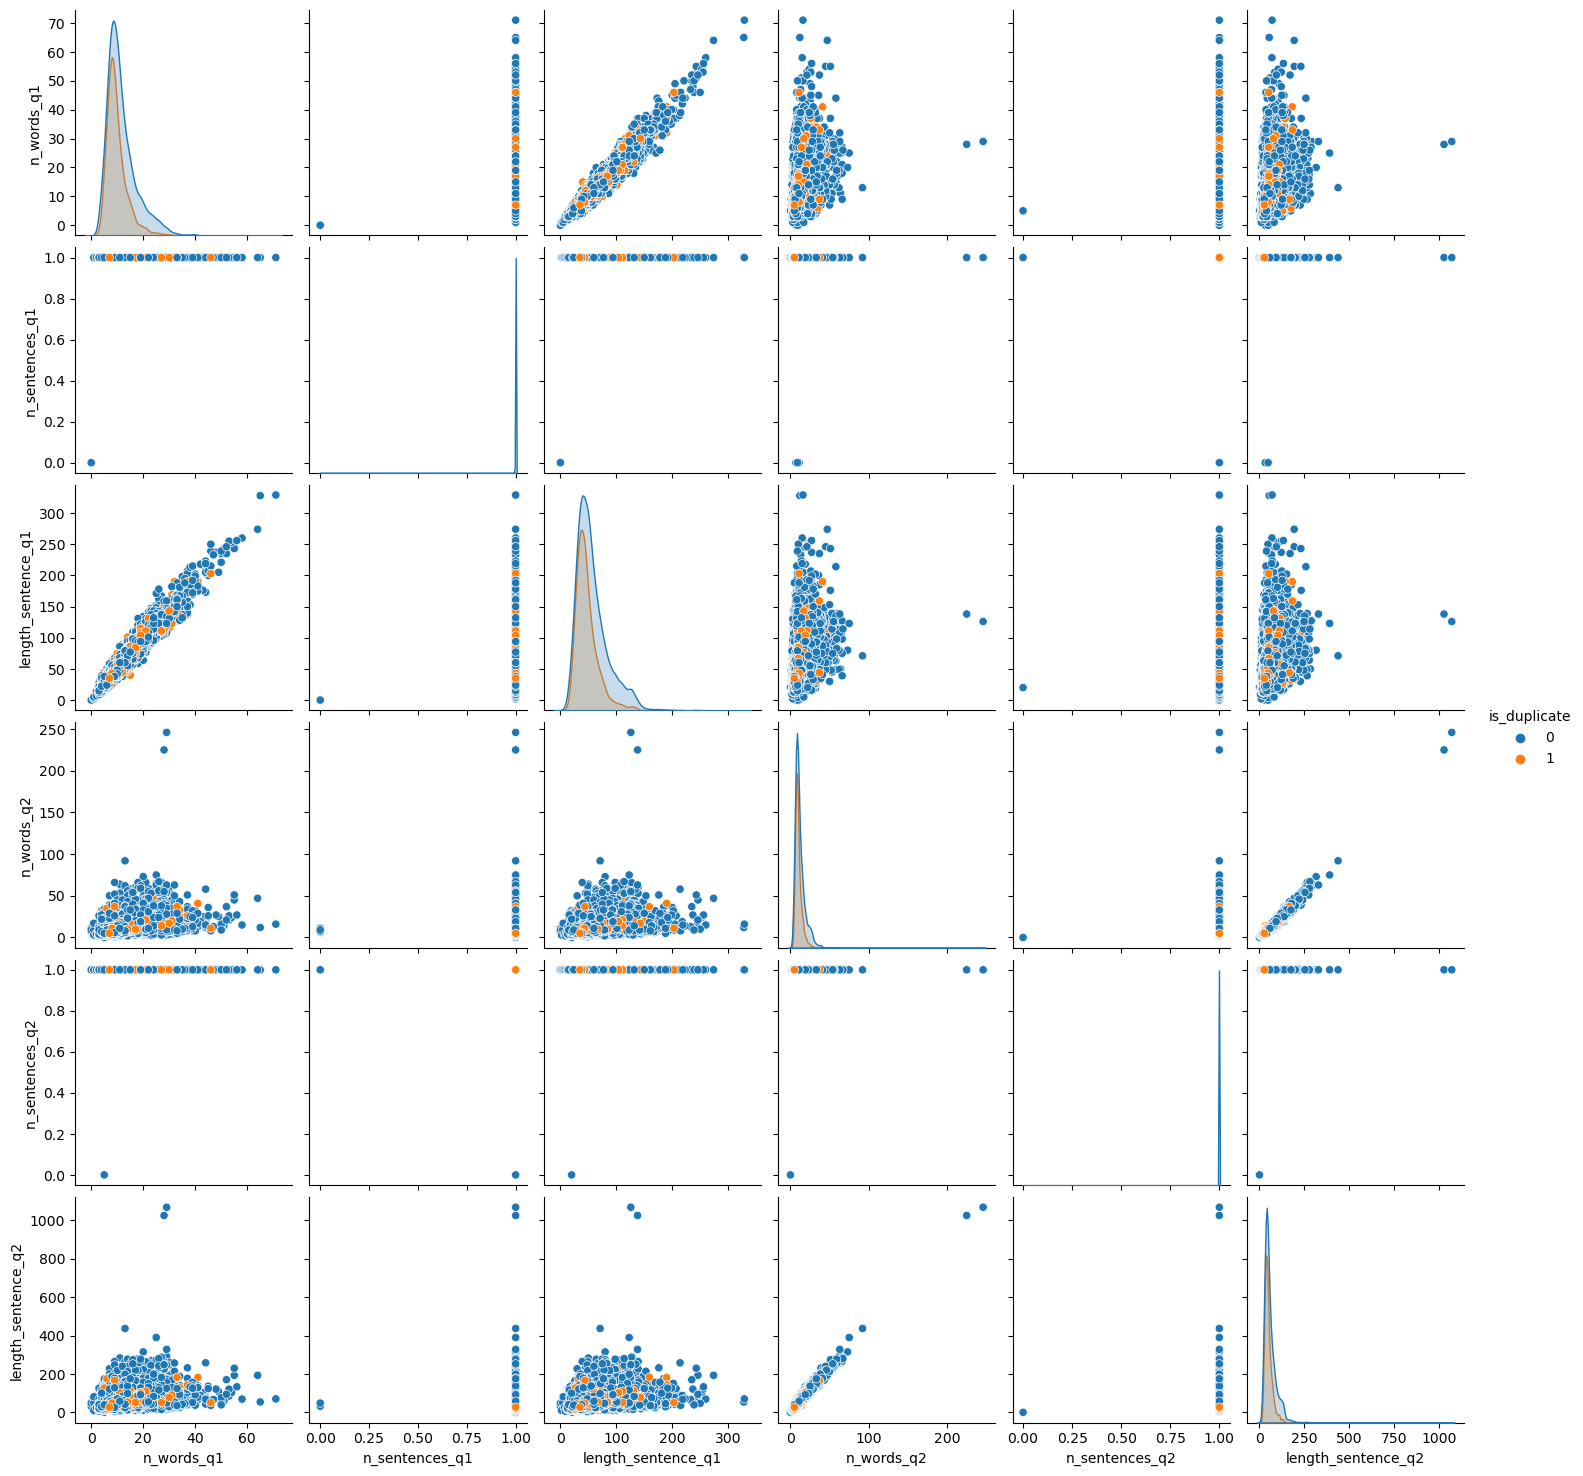

In [36]:
create_pairplot(sample_df,['n_words_q1', 'n_sentences_q1', 'length_sentence_q1', 
           'n_words_q2', 'n_sentences_q2', 'length_sentence_q2','is_duplicate'],"is_duplicate")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

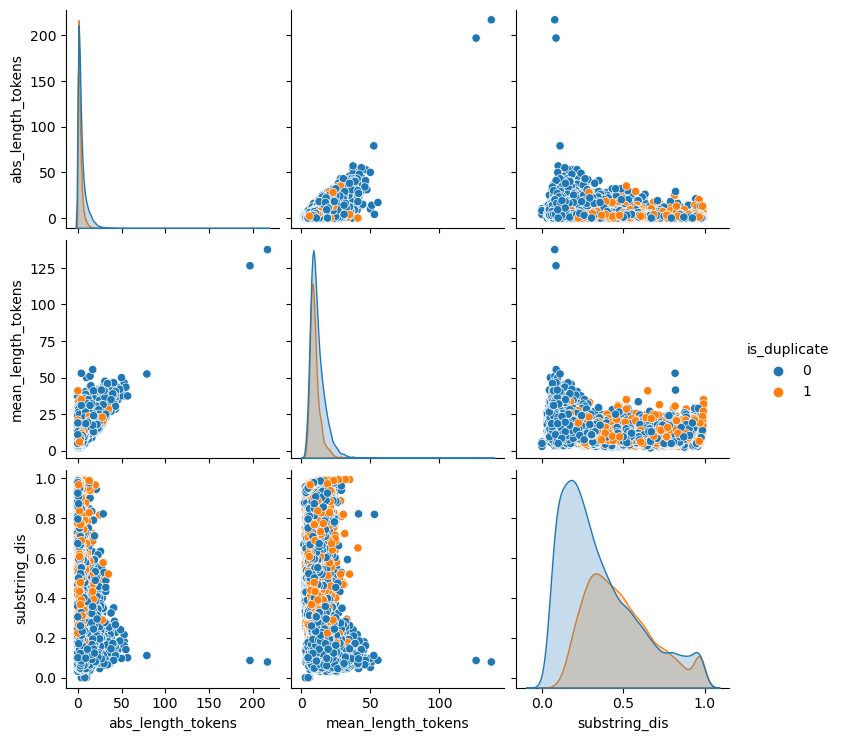

In [37]:
create_pairplot(sample_df,['abs_length_tokens', 'mean_length_tokens', 'substring_dis',"is_duplicate"],"is_duplicate")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

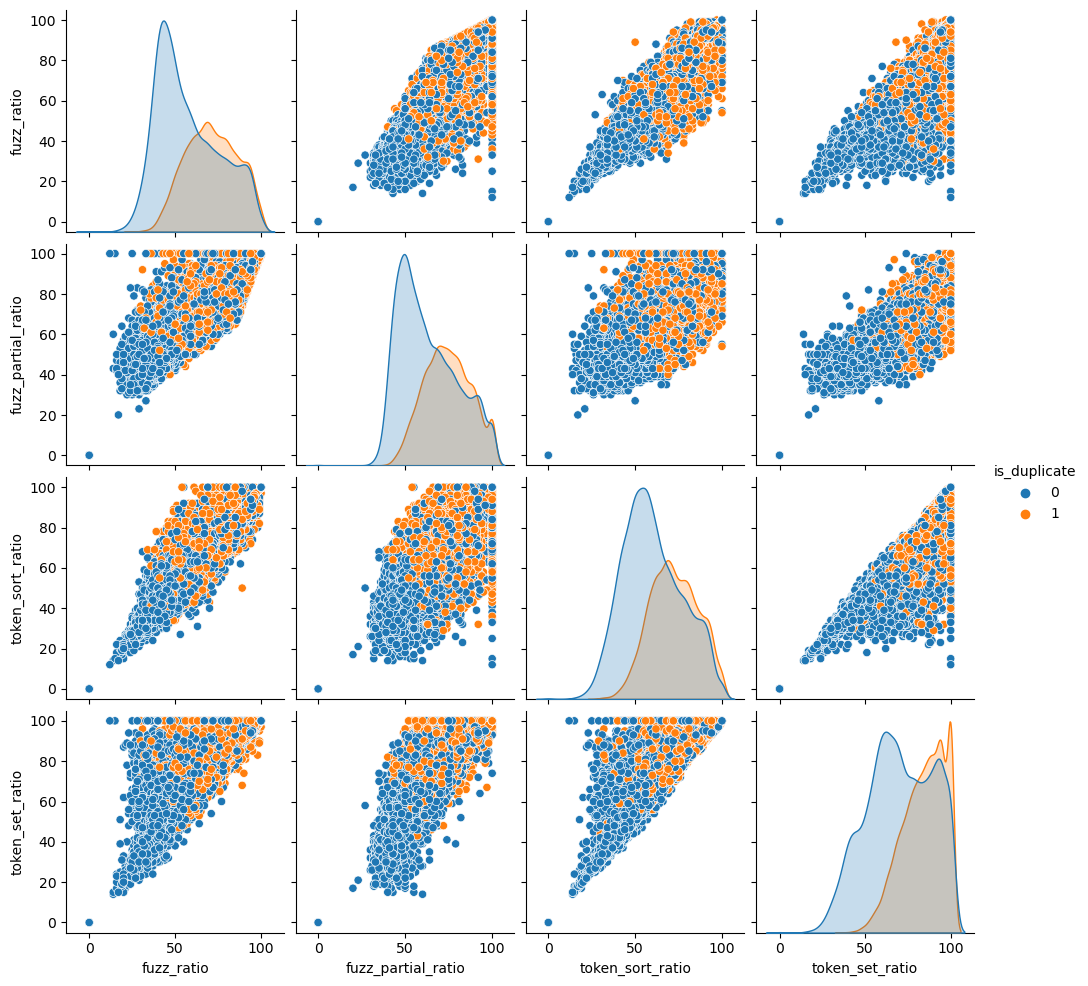

In [38]:

create_pairplot(sample_df,['fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio',
       'token_set_ratio','is_duplicate'],"is_duplicate")

### Remarks about EDA: 
#### We can clearly see the diagonal curve's probability/value which gives a fair amount of intution that under a certain threshold the questions are not duplicate

# Vectorization / Feature Extraction

## Technique: Word Embeddings
### Reason: We could also use TFIDF or BOW but word embeddings catch the semantic meaning as well thats why we are using that.

In [39]:
from gensim.models import Word2Vec

In [40]:
tokenized_sentences = []
for description in df['clean_question1']: 
    words = word_tokenize(description)  # Tokenize sentence into words
    tokenized_sentences.append(words)
    
for description in df['clean_question2']: 
    words = word_tokenize(description)  # Tokenize sentence into words
    tokenized_sentences.append(words)

In [41]:
def get_word_embeddings(text, model):
    embeddings = []
    for word in text:
        if word in model.wv:
            embeddings.append(model.wv[word])
    return embeddings

def get_mean_embeddings(text, model, remove_stopwords=True):
    tokens = word_tokenize(text.lower())
    embeddings = get_word_embeddings(tokens, model)
    if embeddings:
        mean_embedding = np.mean(embeddings, axis=0)
    else:
        mean_embedding = np.zeros(model.vector_size)
    return mean_embedding

In [42]:
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=128, window=5, min_count=1, workers=4,epochs=10)

In [43]:
df['embeddings_q1'] = df['clean_question1'].apply(lambda x: get_mean_embeddings(x, word2vec_model))

In [44]:
df['embeddings_q2'] = df['clean_question2'].apply(lambda x: get_mean_embeddings(x, word2vec_model))

In [45]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,clean_question1,clean_question2,n_words_q1,n_sentences_q1,...,word_share,abs_length_tokens,mean_length_tokens,substring_dis,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,embeddings_q1,embeddings_q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,14,1,...,0.48,2,13.0,0.982143,92,100,92,100,"[0.46940425, 0.07505119, 0.6866508, 0.16958758...","[0.46570048, -0.06765952, 0.72083277, 0.164682..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the stori of kohinoor kohinoor diamond,what would happen if the indian govern stole t...,8,1,...,0.22,5,10.5,0.553191,66,74,64,81,"[0.018902702, -0.05207253, -0.032015294, -0.04...","[-0.48503798, 0.33716038, -0.08209869, 0.30242..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,14,1,...,0.21,4,12.0,0.188679,54,56,66,73,"[-0.32344645, -0.29120198, 0.33925352, -0.2541...","[-0.33287716, -0.31719753, 0.50713706, -0.3122..."
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,whi am i mental veri lone how can i solv it,find the remaind when math is divid by,11,1,...,0.00,3,9.5,0.051282,40,43,40,38,"[-1.0042363, -0.4630476, 0.49785468, -0.248254...","[-0.3904178, -0.9731487, 0.13959253, -0.641257..."
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,13,1,...,0.20,6,10.0,0.157895,45,54,49,68,"[-0.17516841, -0.517127, 0.4913812, 0.34811747...","[-0.6870107, -0.3946788, 0.034051593, 0.121734..."


# Preparing the dataset for modeling

In [46]:
emb_question1=np.vstack(df['embeddings_q1'])

In [47]:
emb_question2=np.vstack(df['embeddings_q2'])

In [48]:
emb_question2.shape

(404348, 128)

In [49]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'clean_question1', 'clean_question2', 'n_words_q1', 'n_sentences_q1',
       'length_sentence_q1', 'n_words_q2', 'n_sentences_q2',
       'length_sentence_q2', 'common_words', 'total_words', 'word_share',
       'abs_length_tokens', 'mean_length_tokens', 'substring_dis',
       'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio',
       'token_set_ratio', 'embeddings_q1', 'embeddings_q2'],
      dtype='object')

In [50]:
cols=['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'clean_question1', 'clean_question2','embeddings_q1', 'embeddings_q2']

In [51]:
rem_data=df.drop(cols,axis=1).values

In [52]:
rem_data.shape

(404348, 16)

In [53]:
final_dataset=np.concatenate((emb_question1,emb_question2,rem_data),axis=1)

In [54]:
final_dataset.shape

(404348, 272)

In [55]:
final_dataset[0]

array([ 4.69404250e-01,  7.50511885e-02,  6.86650813e-01,  1.69587582e-01,
        1.87974900e-01, -1.31450903e+00, -4.77445126e-01, -1.50879636e-01,
       -2.54543126e-01,  4.75527942e-01,  1.14136517e+00,  5.16138487e-02,
        3.36122781e-01, -1.44452125e-01, -5.61958253e-01, -7.48654187e-01,
        8.56362164e-01,  1.39005050e-01, -3.50417227e-01,  4.50810283e-01,
       -6.16478860e-01, -5.16857922e-01, -1.88393131e-01, -4.56172258e-01,
        1.33615807e-01,  1.09098673e-01, -2.49344725e-02, -2.72889525e-01,
        6.39403880e-01,  2.68494874e-01,  5.37557244e-01, -9.89964008e-02,
        5.72527647e-02,  1.14242435e+00, -1.11790061e-01, -1.28148645e-01,
        6.95561320e-02,  3.12322527e-01,  3.08158010e-01,  1.54910251e-01,
       -3.52299929e-01,  2.84393758e-01,  1.25708234e+00, -1.27029073e+00,
        1.02482617e+00, -4.10796493e-01,  2.75896549e-01, -4.92338449e-01,
       -2.11477116e-01,  2.60111004e-01,  2.45837554e-01, -1.02754962e+00,
       -9.65932429e-01,  

### Train and test split

In [56]:
y=df['is_duplicate'].values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(final_dataset,y,train_size=0.9,random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc=RandomForestClassifier(n_estimators=50,random_state=2)

In [61]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [62]:
predict_rfc=rfc.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [64]:
accuracy_score(y_test,predict_rfc)

0.8142450847038457

In [65]:
precision_score(y_test,predict_rfc)

0.7692594248249143

<Axes: >

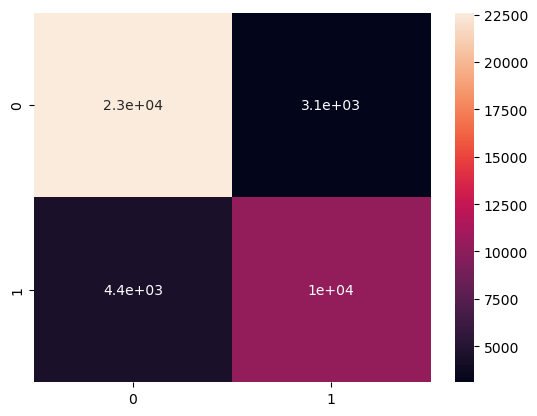

In [66]:
sns.heatmap(confusion_matrix(y_test,predict_rfc),annot=True)

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [68]:
gnb=GaussianNB()
knc = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear', penalty='l1')
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
lr.fit(x_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [70]:
accuracy_score(y_test,lr.predict(x_test))

0.747842215902065

In [71]:
precision_score(y_test,lr.predict(x_test))

0.669704893537542

In [72]:
gnb.fit(x_train,y_train)

GaussianNB()

In [73]:
accuracy_score(y_test,gnb.predict(x_test))

0.6723383207617163

In [74]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [75]:
accuracy_score(y_test,knc.predict(x_test))

0.7640657845925559

In [76]:
abc.fit(x_train,y_train)

AdaBoostClassifier(random_state=2)

In [77]:
accuracy_score(y_test,abc.predict(x_test))

0.7306294052182515

In [78]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [79]:
accuracy_score(y_test,xgb.predict(x_test))

0.7923333745517497

In [80]:
precision_score(y_test,xgb.predict(x_test))

0.7201777530898487

## Amongst all the algorithms , RFC(Random Forest Classifier) performed well , so we are going with that

In [81]:
import pickle

### Saving the model

In [82]:
pickle.dump(rfc,open("rfc_duplicate.pkl","wb"))

### Saving the embedding word2vec model

In [83]:
pickle.dump(word2vec_model,open("word2vec_duplicate.pkl","wb"))